In [3]:
import numpy as np
import pandas as pd

In [2]:
# Save emp_df to csv file (with department information)
emp_df = pd.read_csv('data/employees_full.csv')
df1 = emp_df.head()
df1

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,HIRE_YEAR,DEPARTMENT_NAME
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000,0.0,0,90,2003,Executive
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000,0.0,100,90,2005,Executive
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000,0.0,100,90,2001,Executive
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000,0.0,102,60,2006,IT
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000,0.0,103,60,2007,IT


### Bar plot

In [4]:
df1.dtypes

EMPLOYEE_ID          int64
FIRST_NAME          object
LAST_NAME           object
EMAIL               object
PHONE_NUMBER        object
HIRE_DATE           object
JOB_ID              object
SALARY               int64
COMMISSION_PCT     float64
MANAGER_ID           int64
DEPARTMENT_ID        int64
HIRE_YEAR            int64
DEPARTMENT_NAME     object
dtype: object

<Axes: >

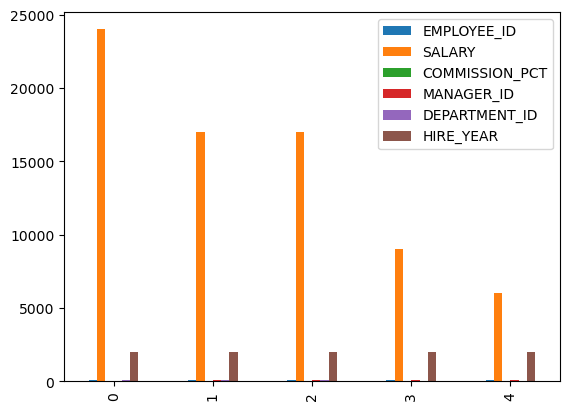

In [5]:
df1.plot.bar()

In [6]:
df1[['SALARY','MANAGER_ID','LAST_NAME']]

,SALARY,MANAGER_ID,LAST_NAME
0,24000,0,King
1,17000,100,Kochhar
2,17000,100,De Haan
3,9000,102,Hunold
4,6000,103,Ernst


<Axes: >

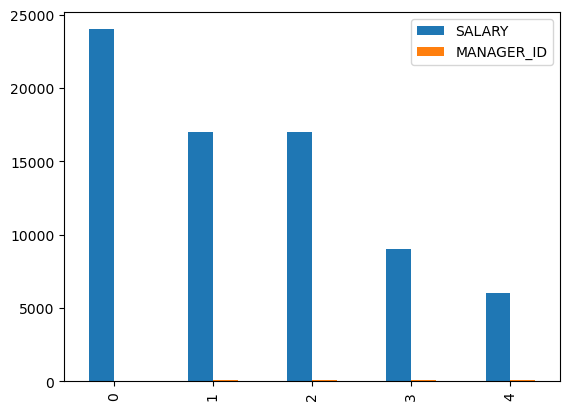

In [7]:
df1[['SALARY','MANAGER_ID','LAST_NAME']].plot.bar()

<Axes: title={'center': 'Biểu đồ bar'}, xlabel='LAST_NAME'>

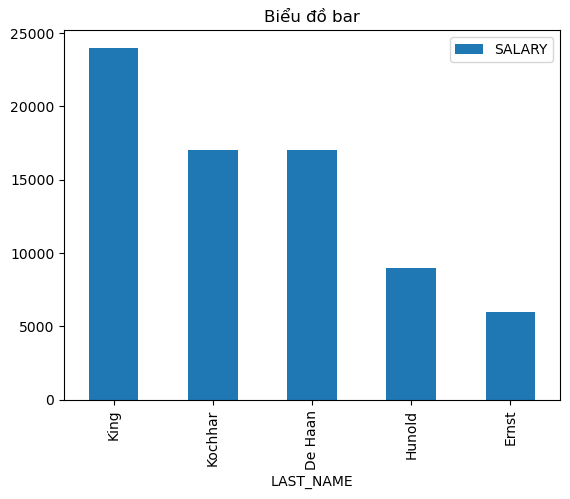

In [8]:
df1[['SALARY','MANAGER_ID','LAST_NAME']].plot.bar(x='LAST_NAME',y='SALARY',title = 'Biểu đồ bar')

In [9]:
cnt_ser = emp_df.DEPARTMENT_NAME.value_counts()
cnt_ser

Shipping            45
Sales               35
Finance              6
Purchasing           6
IT                   5
Executive            3
Marketing            2
Accounting           2
Administration       1
Human Resources      1
Public Relations     1
Name: DEPARTMENT_NAME, dtype: int64

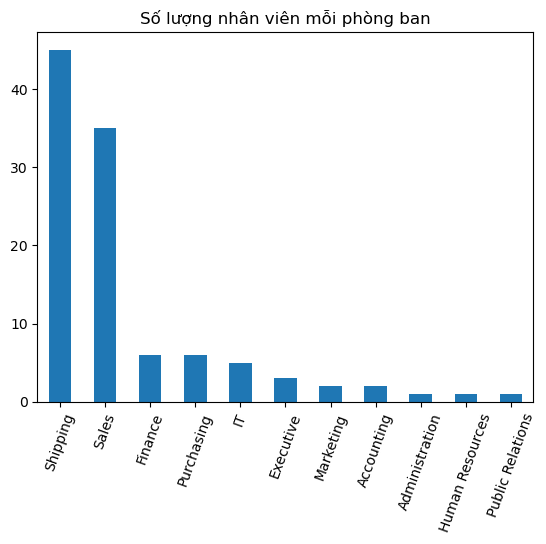

In [10]:
# count number of employees by department
cnt_ser.plot.bar(title = 'Số lượng nhân viên mỗi phòng ban',rot=70);

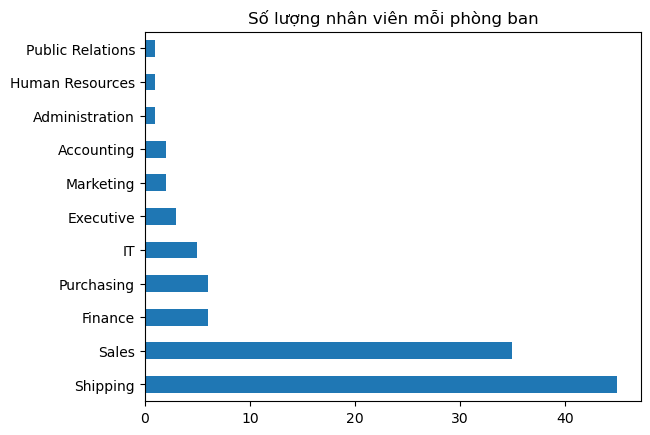

In [11]:
cnt_ser.plot.barh(title = 'Số lượng nhân viên mỗi phòng ban');

In [12]:
salary_ser = emp_df.groupby('DEPARTMENT_ID')['SALARY'].mean().sort_values(ascending = False)
salary_ser

DEPARTMENT_ID
90     19333.333333
110    10154.000000
70     10000.000000
20      9500.000000
80      8900.000000
100     8601.333333
40      6500.000000
60      5760.000000
10      4400.000000
30      4150.000000
50      3475.555556
Name: SALARY, dtype: float64

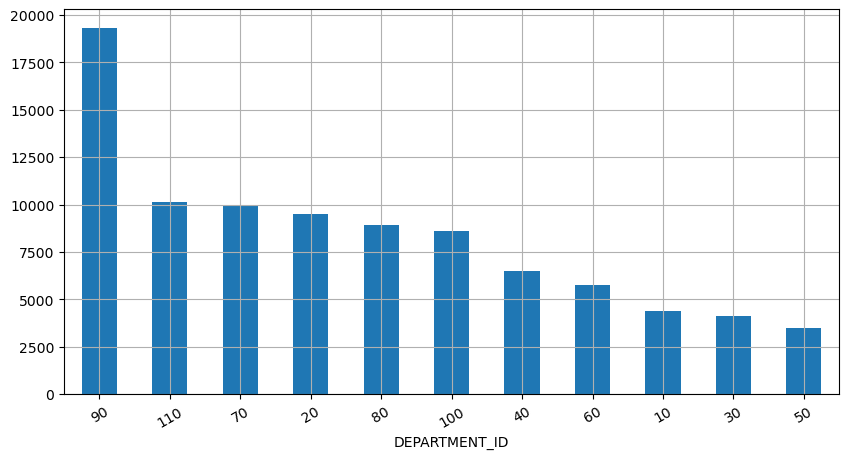

In [13]:
# calculate average salary by DEPARTMENT_ID
salary_ser.plot.bar(figsize = (10,5), rot = 30, grid = True);

In [14]:
# calculate minimum, average, maximum salary by DEPARTMENT_NAME
# of 5 departments with highest average salary
salary_df = emp_df.groupby('DEPARTMENT_NAME')['SALARY'].agg(['min', 'mean', 'max']).\
            sort_values('mean', ascending = False).head()
salary_df

,min,mean,max
DEPARTMENT_NAME,,,
Executive,17000,19333.333333,24000
Accounting,8300,10154.000000,12008
Public Relations,10000,10000.000000,10000
Marketing,6000,9500.000000,13000
Sales,6100,8900.000000,14000


<Axes: xlabel='DEPARTMENT_NAME'>

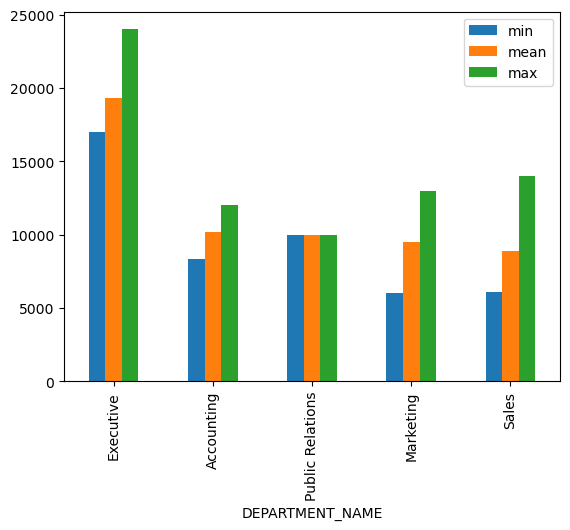

In [15]:
salary_df.plot.bar()

In [16]:
salary_df[['min', 'max']]

,min,max
DEPARTMENT_NAME,,
Executive,17000,24000
Accounting,8300,12008
Public Relations,10000,10000
Marketing,6000,13000
Sales,6100,14000


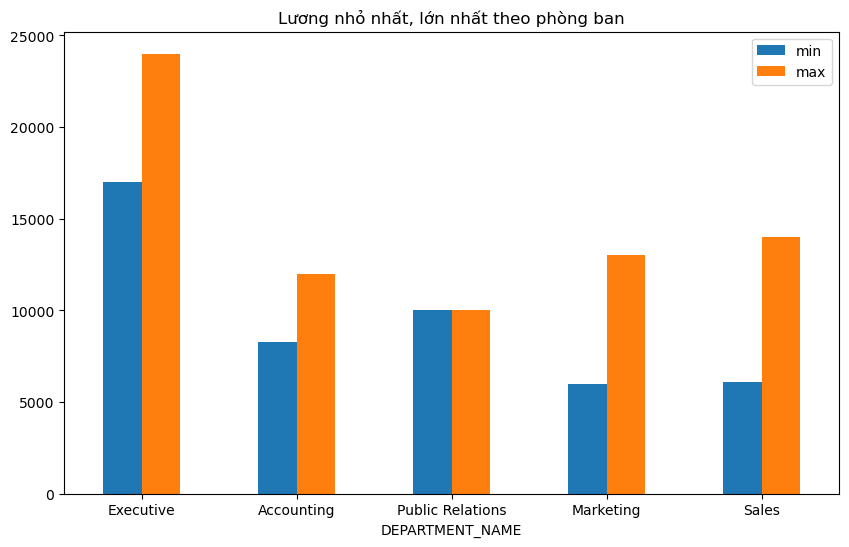

In [17]:
salary_df[['min', 'max']].plot.bar(figsize = (10,6), rot = 0,
                                   title = 'Lương nhỏ nhất, lớn nhất theo phòng ban');

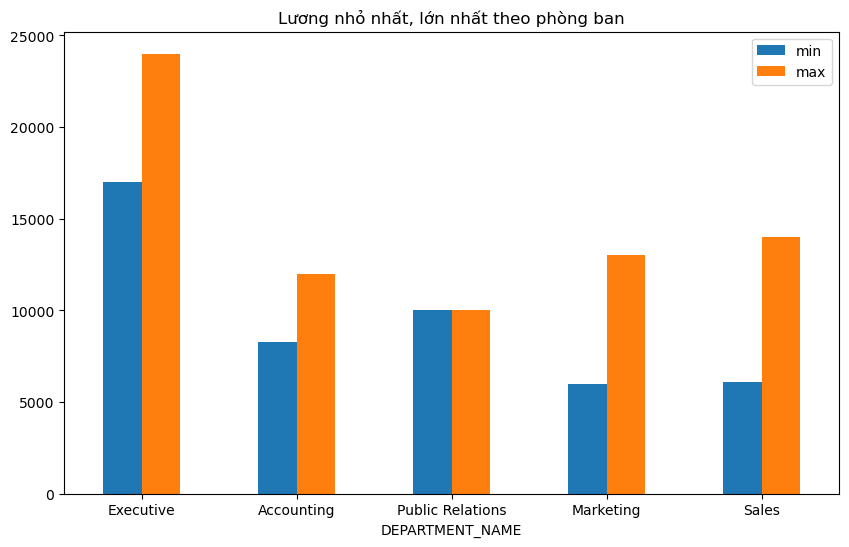

In [18]:
# Draw a chart of the smallest and largest salaries of the 5 departments with the highest average salaries
salary_df[['min', 'max']].plot.bar(figsize = (10,6), rot = 0,
                                   title = 'Lương nhỏ nhất, lớn nhất theo phòng ban');

In [19]:
df_cnt = pd.crosstab(index=emp_df['DEPARTMENT_NAME'], columns=emp_df['HIRE_YEAR'], margins=True) # đếm
df_cnt

HIRE_YEAR,2001,2002,2003,2004,2005,2006,2007,2008,All
DEPARTMENT_NAME,,,,,,,,,
Accounting,0,2,0,0,0,0,0,0,2
Administration,0,0,1,0,0,0,0,0,1
Executive,1,0,1,0,1,0,0,0,3
Finance,0,2,0,0,2,1,1,0,6
Human Resources,0,1,0,0,0,0,0,0,1
IT,0,0,0,0,1,2,2,0,5
Marketing,0,0,0,1,1,0,0,0,2
Public Relations,0,1,0,0,0,0,0,0,1
Purchasing,0,1,1,0,2,1,1,0,6


In [20]:
df_cnt = df_cnt.sort_values('All').iloc[:-1, :-1]
df_cnt

HIRE_YEAR,2001,2002,2003,2004,2005,2006,2007,2008
DEPARTMENT_NAME,,,,,,,,
Administration,0,0,1,0,0,0,0,0
Human Resources,0,1,0,0,0,0,0,0
Public Relations,0,1,0,0,0,0,0,0
Accounting,0,2,0,0,0,0,0,0
Marketing,0,0,0,1,1,0,0,0
Executive,1,0,1,0,1,0,0,0
IT,0,0,0,0,1,2,2,0
Finance,0,2,0,0,2,1,1,0
Purchasing,0,1,1,0,2,1,1,0


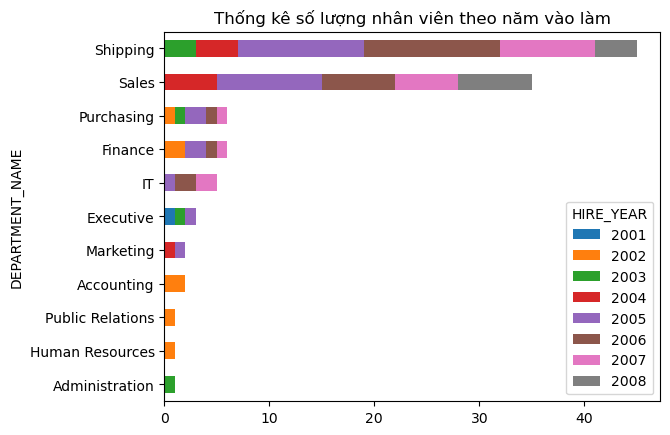

In [21]:
df_cnt.plot.barh(stacked = True, title = 'Thống kê số lượng nhân viên theo năm vào làm');

## Line plot

In [22]:
df_cnt = emp_df.groupby('HIRE_YEAR', as_index=False)['FIRST_NAME'].count()
df_cnt

,HIRE_YEAR,FIRST_NAME
0,2001,1
1,2002,7
2,2003,6
3,2004,10
4,2005,29
5,2006,24
6,2007,19
7,2008,11


In [23]:
df_cnt = df_cnt.rename(columns={'FIRST_NAME':'COUNT'})
df_cnt

,HIRE_YEAR,COUNT
0,2001,1
1,2002,7
2,2003,6
3,2004,10
4,2005,29
5,2006,24
6,2007,19
7,2008,11


<Axes: >

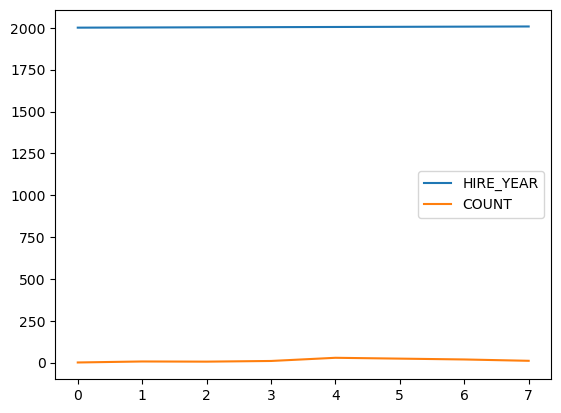

In [24]:
df_cnt.plot()

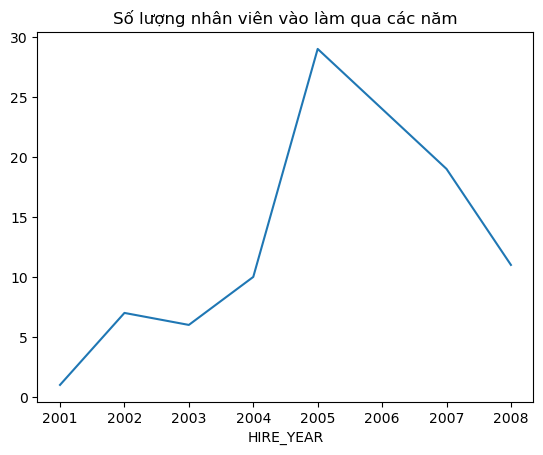

In [25]:
df_cnt.plot(x = 'HIRE_YEAR',
           title = 'Số lượng nhân viên vào làm qua các năm',legend=False);

In [26]:
ser = emp_df.HIRE_YEAR.value_counts()
ser = ser.sort_index()
ser

2001     1
2002     7
2003     6
2004    10
2005    29
2006    24
2007    19
2008    11
Name: HIRE_YEAR, dtype: int64

<Axes: >

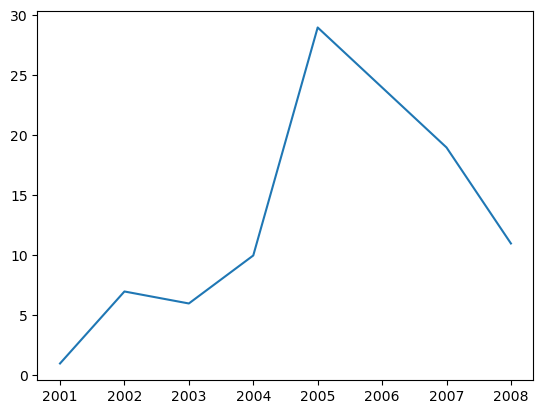

In [27]:
ser.plot()

In [28]:
salary_df

,min,mean,max
DEPARTMENT_NAME,,,
Executive,17000,19333.333333,24000
Accounting,8300,10154.000000,12008
Public Relations,10000,10000.000000,10000
Marketing,6000,9500.000000,13000
Sales,6100,8900.000000,14000


<Axes: xlabel='DEPARTMENT_NAME'>

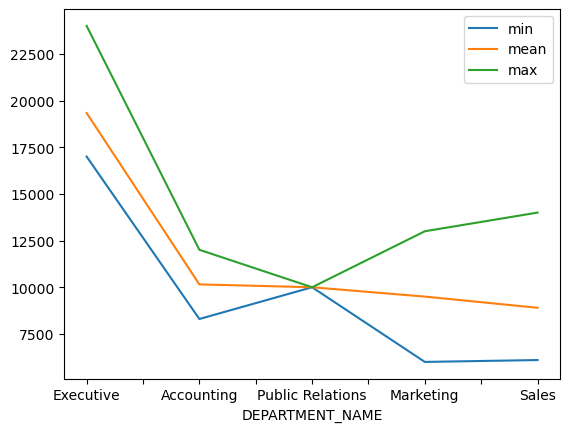

In [29]:
salary_df.plot()

<Axes: xlabel='DEPARTMENT_NAME'>

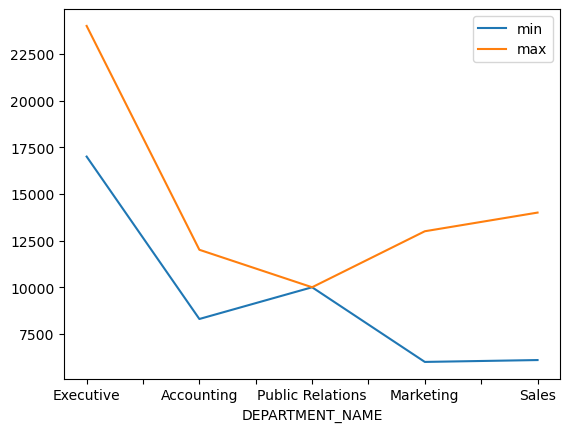

In [30]:
salary_df[['min','max']].plot()